In [2]:
from scipy import stats
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from itertools import combinations

## Урок 8. Двухфакторный дисперсионный анализ. Факторный анализ. Логистическая регрессия.

**1. Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):**

```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```

**Допустим, первые 5 клиентов проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?**

In [10]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
city = np.array(['msk', 'msk', 'msk', 'msk', 'msk', 'spb', 'spb', 'spb', 'spb', 'spb'])

In [20]:
color_map = {'msk': 'C0', 'spb': 'C3'}
color = [color_map[i] for i in city]

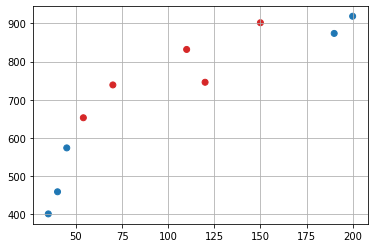

In [21]:
plt.scatter(salary, scoring, color=color)
plt.grid()
plt.show()

Разобьем выборку на две части и с помощью однофакторного дисперсионного анализа проверим, как влияет город проживания на кредитный рейтинг.

In [25]:
y1 = scoring[:5]
y2 = scoring[5:]

n1 = len(y1)
n2 = len(y2)

Выборочные средние по каждой группе:

In [26]:
y1_mean = y1.mean()
y2_mean = y2.mean()

y1_mean, y2_mean

(645.4, 774.4)

Проверяется гипотеза $H0$ о том что средние значения по каждой выборке одинаковы. Для этго используется статистика с распределением Фишера 
$$F_H = \frac{\sigma_{b}^{2}}{\sigma_{w}^{2}}$$

$\sigma_b$ - факторная дисперсия, дисперсия между группами.

$\sigma_w$ - остаточная дисперсия, отклонение внутри группы.

$$\sigma_b^2 = \frac{S_b^2}{k-1} = \frac{1}{k-1}\sum\limits_{i=1}^{k}(\overline{y}_i - \overline{Y})^{2}n_i$$

$$\sigma_w^2 = \frac{S_w^2}{n - k} = \frac{1}{n - k}\sum\limits_{i=1}^{k}\sum\limits_{j=1}^{n_i}(y_{ij} - \overline{y}_i)^2$$

$k = 2$ - это количество уровней фактора (у нас два города).

$n = n_1 + n_2 = 10$ - общее число наблюдений.

$\overline{Y}$ - среднее значение целевого показателя (кредитного рейтинга) по всем выборкам.

In [33]:
Y_mean = np.concatenate([y1, y2]).mean()
Y_mean

709.9

In [40]:
S2_b = (y1_mean - Y_mean) ** 2 * n1 + (y2_mean - Y_mean) ** 2 * n2
S2_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum()

S2_b, S2_w

(41602.5, 263086.39999999997)

In [50]:
k = 2
n = n1 + n2

sigm2_b = S2_b / (k-1)
sigm2_w = S2_w / (n-k)

sigm2_b, sigm2_w

(41602.5, 32885.799999999996)

In [52]:
alpha = 0.05
k1 = k - 1
k2 = n - k

F = sigm2_b / sigm2_w
F_krit = stats.f.ppf(1-alpha, k1, k2)

F, F_krit

(1.2650596914169643, 5.317655071578714)

Для уровня критичности 0.05 получили что $F < F_{крит}$, то есть для наших выборок значение статистики $F$ не попадает в критическую область. Следовательно гипотеза $H_0$ устояла. Город проживания не влияет на значение кредитного рейтинга.

**Ответ: город проживания не влияет на значение кредитного рейтинга.**

**2. Объясняемая переменная y зависит от двух категориальных факторов A и B, причём фактор A имеет 3 уровня, а фактор B - 4 уровня. Результаты наблюдений приведены в таблице:**

```
y = [[2.68, 3.29, 2.88, 4.45],
     [4.12, 4.96, 5.09, 5.22],
     [5.52, 4.50, 5.42, 5.29]]
```

**С помощью двухфакторного дисперсионного анализа проверьте влияние каждого из факторов на переменную y.**

По каждому фактору проверяется нулевая гипотеза о равенстве средних значений на каждом уровне. Статистика для гипотезы о влиянии факторов $A$ и $B$:

$$F_a = \dfrac{\sigma_a^2}{\sigma_w^2}, \:\:\ F_b = \dfrac{\sigma_b^2}{\sigma_w^2}$$

Эти статистики имеют распределение Фишера с параметрами $k_{1a} = m - 1$, $k_{2a} = n - m$ и $k_{1b} = k - 1$, $k_{2b} = n - k$ соответственно, где 

$m = 3$ - число уровней фактора $A$, 

$k = 4$ - число уровней фактора $B$, 

$n = 12$ - число наблюдений.


$$\sigma_a^2 = \dfrac{S_a^2}{m - 1}, \:\: \sigma_b^2 = \dfrac{S_b^2}{k - 1}, \:\: \sigma_w^2 = \dfrac{S_w^2}{(k - 1) (m - 1)}$$

$\sigma_a^2$ и $\sigma_b^2$ - оценки дисперсии между уровнями каждого фактора. 

$\sigma_w^2$ - оценка дисперсии внутри всей выборки.

$$S_a^2 = k \cdot \displaystyle\sum_{i=1}^m \left( \overline{Y_{i \ast}} - \overline{Y} \right)^2, \:\: S_b^2 = m \cdot \displaystyle\sum_{j=1}^k \left( \overline{Y_{\ast j}} - \overline{Y} \right)^2, \:\: S_w^2 = \displaystyle\sum_{i=1}^m \displaystyle\sum_{j=1}^k \left( y_{ij} - \overline{Y_{i \ast}} - \overline{Y_{\ast j}} + \overline{Y} \right)^2$$

$\overline{Y}$ - среднее значение целевой переменной по всей выборке.

$\overline{Y_{i \ast}}$ - среднее значение переменной $y$ на $i$-м уровне фактора $A$.

$\overline{Y_{\ast j}}$ - среднее значение переменной $y$ на $j$-м уровне фактора $B$.

In [69]:
y = np.array([
    [2.68, 3.29, 2.88, 4.45],
    [4.12, 4.96, 5.09, 5.22],
    [5.52, 4.50, 5.42, 5.29]
])

m, k = y.shape
n = y.size

m, k, n

(3, 4, 12)

In [58]:
# среднее по выборке
Y_mean = y.mean()
Y_mean

4.451666666666666

In [75]:
# среднее по строкам
Ya_mean = y.mean(axis=1)
Ya_mean

array([3.325 , 4.8475, 5.1825])

In [79]:
# среднее по столбцам
Yb_mean = y.mean(axis=0)
Yb_mean

array([4.10666667, 4.25      , 4.46333333, 4.98666667])

In [77]:
S2_a = k * ((Ya_mean - Y_mean) ** 2).sum()
S2_b = m * ((Yb_mean - Y_mean) ** 2).sum()

S2_a, S2_b

(7.8407166666666654, 1.338166666666669)

In [82]:
S2_w = 0

for i in range(3):
    for j in range(4):
        S2_w += (y[i][j]  - Ya_mean[i] - Yb_mean[j] + Y_mean) ** 2

S2_w

1.9298833333333327

In [83]:
sigm2_a = S2_a / (m-1)
sigm2_b = S2_b / (k-1)
sigm2_w = S2_w / ((k-1)*(m-1))

sigm2_a, sigm2_b, sigm2_w

(3.9203583333333327, 0.4460555555555563, 0.32164722222222214)

In [87]:
alpha = 0.05

Для фактора $A$:

In [88]:
k1_a = m - 1
k2_a = n - m

F_a = sigm2_a / sigm2_w
F_a_krit = stats.f.ppf(1-alpha, k1_a, k2_a)

F_a, F_a_krit

(12.188379262995173, 4.25649472909375)

$F_a > F_{a\:крит}$ следовательно гипотеза о равенстве средних значений на уровнях фактора $A$ отвергается. Значение фактора $A$ влияет на результат.

Для фактора $B$:

In [91]:
k1_b = k - 1
k2_b = n - k

F_b = sigm2_b / sigm2_w
F_b_krit = stats.f.ppf(1-alpha, k1_b, k2_b)

F_b, F_b_krit

(1.386785038819275, 4.06618055135116)

$F_b < F_{b\:крит}$ следовательно гипотеза о равенстве средних значений на уровнях фактора $B$ устояла. Значение фактора $B$ не влияет на результат.

**Ответ: фактор $A$ начим, фактор $B$ нет.**

**3. Прикрепите ссылку на курсовой проект на github (см. выбор темы в ДЗ к Уроку 6).**